In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [2]:
train_dir=r'C:\Users\Alex1121\Documents\deeplearning\Final_Project\Train'
test_dir=r'C:\Users\Alex1121\Documents\deeplearning\Final_Project\Test'
validation_dir=r'C:\Users\Alex1121\Documents\deeplearning\Final_Project\Validation'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="binary")

Found 10000 images belonging to 2 classes.


In [5]:
validation_generator=test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="binary")

Found 800 images belonging to 2 classes.


In [17]:
from tensorflow.keras.applications import InceptionResNetV2

In [18]:
from tensorflow.keras import layers
from tensorflow.keras import models
model=models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=(150, 150, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
#Densely connected network
model.add(keras.layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)            

In [20]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc'])

In [21]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Final_best.h5",save_best_only=True)

In [22]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=500,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=40,
    callbacks=[checkpoint_cb])

Epoch 1/30
500/500 [==============================] - 12s 23ms/step - loss: 0.2202 - acc: 0.9207 - val_loss: 0.1106 - val_acc: 0.9688
Epoch 2/30
500/500 [==============================] - 10s 21ms/step - loss: 0.0824 - acc: 0.9699 - val_loss: 0.0534 - val_acc: 0.9837
Epoch 3/30
500/500 [==============================] - 11s 21ms/step - loss: 0.0553 - acc: 0.9796 - val_loss: 0.0368 - val_acc: 0.9900
Epoch 4/30
500/500 [==============================] - 10s 21ms/step - loss: 0.0444 - acc: 0.9840 - val_loss: 0.0303 - val_acc: 0.9937
Epoch 5/30
500/500 [==============================] - 11s 22ms/step - loss: 0.0361 - acc: 0.9868 - val_loss: 0.0267 - val_acc: 0.9937TA: 1s - l
Epoch 6/30
500/500 [==============================] - 11s 22ms/step - loss: 0.0313 - acc: 0.9882 - val_loss: 0.0311 - val_acc: 0.9887
Epoch 7/30
500/500 [==============================] - 10s 21ms/step - loss: 0.0280 - acc: 0.9906 - val_loss: 0.0256 - val_acc: 0.9937
Epoch 8/30
500/500 [==============================] 

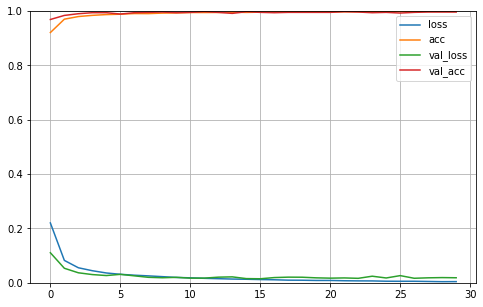

In [24]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [8]:
test_generator=test_datagen.flow_from_directory(
test_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary')
model.evaluate_generator(test_generator,steps=50)

Found 992 images belonging to 2 classes.


c:\users\alex1121\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.035289306193590164, 0.9889112710952759]

In [26]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 992 images belonging to 2 classes.


In [27]:
model.evaluate_generator(test_generator, steps=50)

[0.031027544289827347, 0.9899193644523621]

In [7]:
model=keras.models.load_model("CNN_Project_Final_best.h5")

c:\users\alex1121\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]])

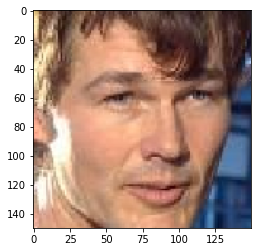

In [9]:
x,y=test_generator.next()
plt.imshow(x[2])
y_pred=model.predict_classes(np.expand_dims(x[2], axis=0))
y_pred#0 means with mask and 1 means without mask